In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import pdb

sys.path.append("../workstatation")
from imitation_learning.linear_regression import DMPTrajectory, load_data, train2
from utils.trajectory_utils import truncate_expert_data

Mean: [1.   0.88 0.78 0.69 0.61]
Std: [ 55.71  71.54  91.86 117.94 117.94]
Mean: [1.   0.88 0.78 0.69 0.61]
Std: [ 55.71  71.54  91.86 117.94 117.94]
Traj start: 491, end: 1615
Traj start: 275, end: 1502
Traj start: 154, end: 1628
Traj start: 478, end: 3597
Traj start: 318, end: 1254
Traj start: 422, end: 1528
ddq: max: -6.108, min: 6.156, mean: 0.004
ddq: max: -13.859, min: 11.057, mean: 0.000
ddq: max: -13.581, min: 12.603, mean: 0.004
ddq: max: -11.030, min: 10.651, mean: 0.001
ddq: max: -7.054, min: 7.303, mean: -0.000
Train size: 5280 Test size: 587
Score (max 1.0) Train: 0.011, Test: 0.011
Got weights for dim: 0, min: -0.021, max: 0.031, avg: 0.004
Score (max 1.0) Train: 0.102, Test: 0.086
Got weights for dim: 1, min: -0.070, max: 0.138, avg: 0.031
Score (max 1.0) Train: 0.002, Test: 0.003
Got weights for dim: 2, min: -0.004, max: 0.009, avg: 0.002
Score (max 1.0) Train: 0.202, Test: 0.181
Got weights for dim: 3, min: -0.145, max: 0.299, avg: 0.053
Score (max 1.0) Train: 0.014, T

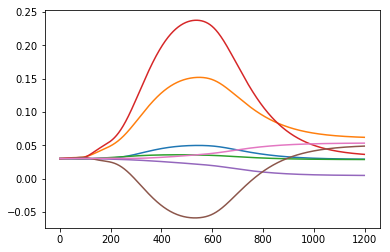

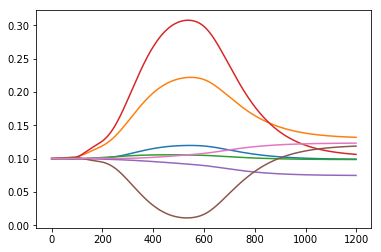

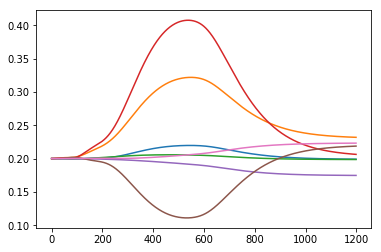

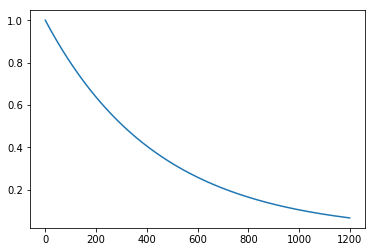

In [2]:
h5_path = '../data/traj_cut_Dec_8_7_00_PM/h5/expert_traj.h5'
num_dims, num_basis, num_sensors = 7, 5, 2                                                                                                                                                        
dmp_traj = DMPTrajectory(num_dims, num_basis, num_sensors)
dmp_traj.tau = 0.75
dmp_traj.alpha = 5.0
dmp_traj.beta = 5.0/4
weights = train2(dmp_traj, h5_path)  

all_y, all_dy = [], []
for i, start_val in enumerate([0.03, 0.1, 0.2]):
    y, dy = dmp_traj.run_dmp_with_weights(
        weights,                                                                                                                                                      
        start_val * np.ones((dmp_traj.num_dims)),                                                                                                                                
        0.003,                                                                                                                                                         
        traj_time=1200)  
    plt.plot(y)
    plt.show()
    all_y.append(y)
    all_dy.append(dy)

all_y, all_dy = np.array(all_y), np.array(all_dy)
    
x = dmp_traj.get_x_values(0.003 * np.ones((1200,)))
plt.plot(x)
plt.show()

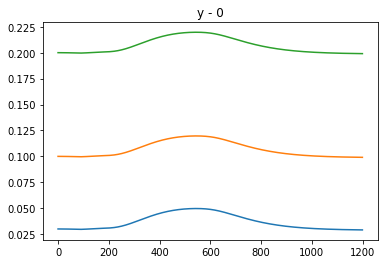

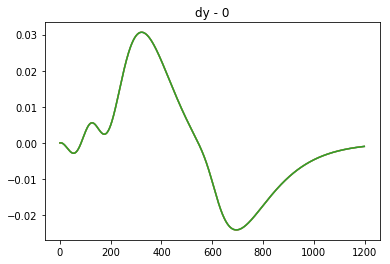

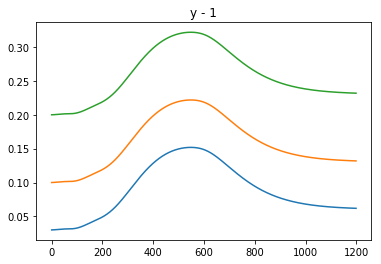

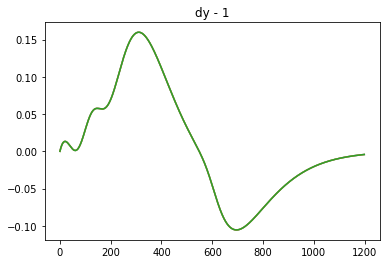

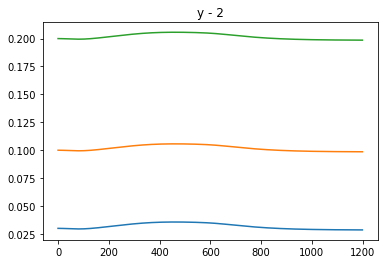

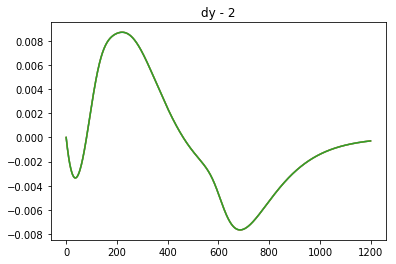

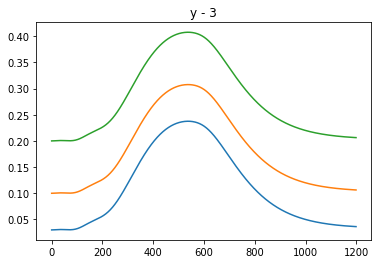

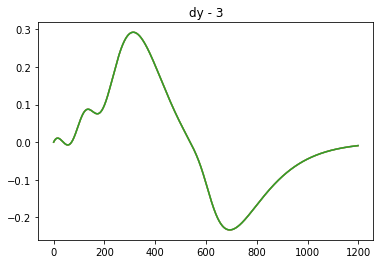

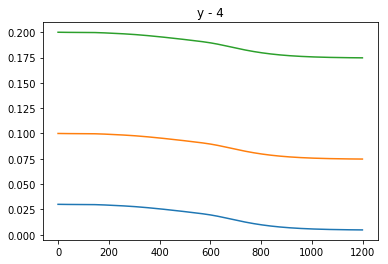

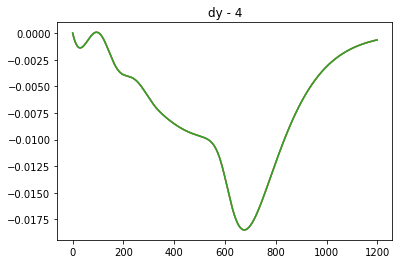

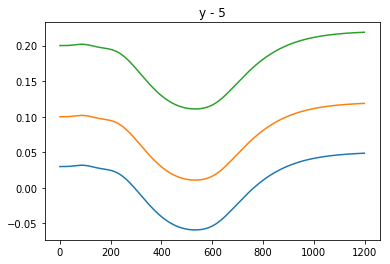

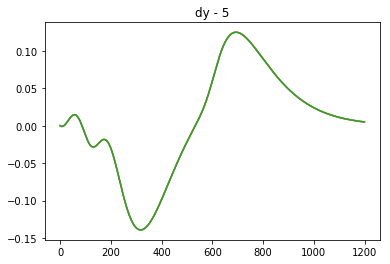

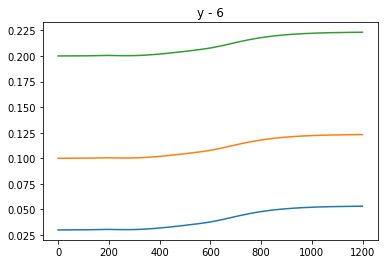

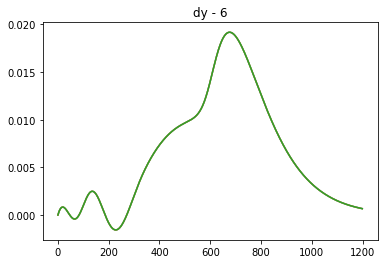

In [3]:
def visualize_dmp_trajectories(data, title=""):
    for i in range(data.shape[0]):
        plt.plot(data[i, :])
        plt.title(title)
    plt.show()

for dim in range(all_y.shape[-1]):
    visualize_dmp_trajectories(all_y[:, :, dim], title="y - {}".format(dim))
    visualize_dmp_trajectories(all_dy[:, :, dim], title="dy - {}".format(dim))